In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [2]:
dataset_url = 'https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


In [10]:
X = dataset.drop(columns=['pIC50'])
y = dataset.iloc[:,-1]

In [6]:
def remove_low_variance(input_data, threshold = 0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold= 0.1)
X.to_csv('descriptor_list.csv',index=False)

In [13]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X,y)
r2 = model.score(X,y)
print(f"Model score is {r2}")


Model score is 0.8837156804588937


In [14]:
y_pred = model.predict(X)
print(f"Mean squared error (MSE): is {mean_squared_error(y, y_pred)} ")
print(f"Coefficient of determination (r^2): is {r2_score(y, y_pred)} ")

Mean squared error (MSE): is 0.28032827162442003 
Coefficient of determination (r^2): is 0.8837156804588937 


Text(0.5, 0, 'Experimental pIC50')

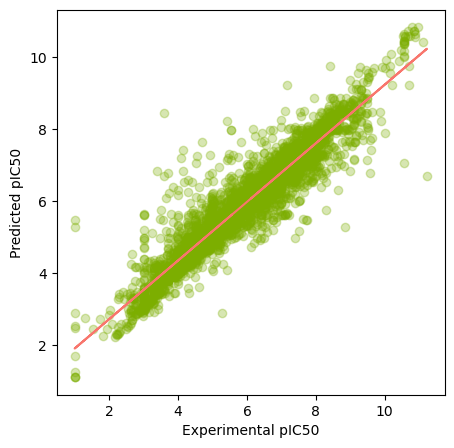

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(x=y, y = y_pred, c = "#7CAE00", alpha = 0.3)
z = np.polyfit(y, y_pred,1)
p = np.poly1d(z)
plt.plot(y,p(y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [31]:
pickle.dump(model,open("/Users/sarrahrose/Downloads/badreputation/acetylcholinesterase_model.pkl"),'wb')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarrahrose/Downloads/badreputation/acetylcholinesterase_model.pkl'

In [25]:
import os
os.getcwd()

'/Users/sarrahrose/Downloads/badreputation'

In [26]:
model

RandomForestRegressor(n_estimators=500, random_state=42)